### Import Libraries and Modules

In [1]:
import numpy as np # NumPy library for arrayhandling and numeriacal operations
import pandas as pd # pandas library for data manipulation and analysis
import matplotlib.pyplot as plt #Matplotlib's pyplot for static visualisations
import seaborn as sns # Seaborn for statistical data visualisation
import plotly.express as px # plotly's express for user-friendly and interactive visualisation
import missingno as mso # Missingno for visualising missing data
from sklearn.pipeline import Pipeline # Pipeline for creating ML workflows
from sklearn.linear_model import LogisticRegression # Imports LogisticRegression for classification tasks
from sklearn.ensemble import RandomForestClassifier # For ensemble-based classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay # Metrics for evaluating model performance
from sklearn.model_selection import train_test_split, GridSearchCV # Function to split data into training and testing sets, GridSearch for hyperparameter tuning
from sklearn.experimental import enable_iterative_imputer # Enable experimental IterativeImputer
from sklearn.impute import SimpleImputer, IterativeImputer # Imputers for handling missing data
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Tools for data preprocessing(scaling and encoding)
from sklearn.compose import ColumnTransformer # For applying different preprocessing steps
from xgboost import XGBClassifier # XGBClassifier for gradient boosting-based classification # Commented out because of XGBoostError 
from sklearn.model_selection import GridSearchCV 

import warnings
warnings.filterwarnings('ignore') # Suppress warnings to keep output clean

ImportError: Error importing numpy: you should not try to import numpy from
        its source directory; please exit the numpy source tree, and relaunch
        your python interpreter from there.

### Read and Explore dataset

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df = pd.read_excel("dataset/E_Commerce_Dataset.xlsx", sheet_name="E Comm") # Using Pandas function to read excel sheet and store in a variable

In [6]:
df.head(10) # Display 10 Rows of the data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


In [7]:
df.shape # Dimensionality of the dataFrame

(5630, 20)

In [8]:
df.describe().info() # Descriptive stats and summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   8 non-null      float64
 1   Churn                        8 non-null      float64
 2   Tenure                       8 non-null      float64
 3   CityTier                     8 non-null      float64
 4   WarehouseToHome              8 non-null      float64
 5   HourSpendOnApp               8 non-null      float64
 6   NumberOfDeviceRegistered     8 non-null      float64
 7   SatisfactionScore            8 non-null      float64
 8   NumberOfAddress              8 non-null      float64
 9   Complain                     8 non-null      float64
 10  OrderAmountHikeFromlastYear  8 non-null      float64
 11  CouponUsed                   8 non-null      float64
 12  OrderCount                   8 non-null      float64
 13  DaySinceLastOrder      

In [9]:
df.describe() # Generate descrpiive statistics

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [10]:
df.info() # Summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [11]:
df.isnull().sum() # Sum of Null/NaN values on each Column

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [12]:
df.duplicated().sum() # Sum of duplicated Rows 

np.int64(0)

In [13]:
df.nunique() # Number of distinct elements for each column

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [14]:
df.drop(columns="CustomerID", inplace=True) # Remove specified Column(CustomerID) inplace(in the current DataFrame)

In [15]:
df.columns # Check Column names

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [16]:
df.columns = [col.lower() for col in df.columns] # Change columns names to lowercase
df.columns # And Check columns

Index(['churn', 'tenure', 'preferredlogindevice', 'citytier',
       'warehousetohome', 'preferredpaymentmode', 'gender', 'hourspendonapp',
       'numberofdeviceregistered', 'preferedordercat', 'satisfactionscore',
       'maritalstatus', 'numberofaddress', 'complain',
       'orderamounthikefromlastyear', 'couponused', 'ordercount',
       'daysincelastorder', 'cashbackamount'],
      dtype='object')

### Create Plots

In [17]:
# Segement the columns of the DataFrame into two lists based on the number of unique values each column contains
count_col = []
hist_col = []
for column in df.columns:
    unique_value = df[column].nunique()
    if unique_value <= 20:
        count_col.append(column)
    else:
        hist_col.append(column)

**Countplots of Categorical Columns**

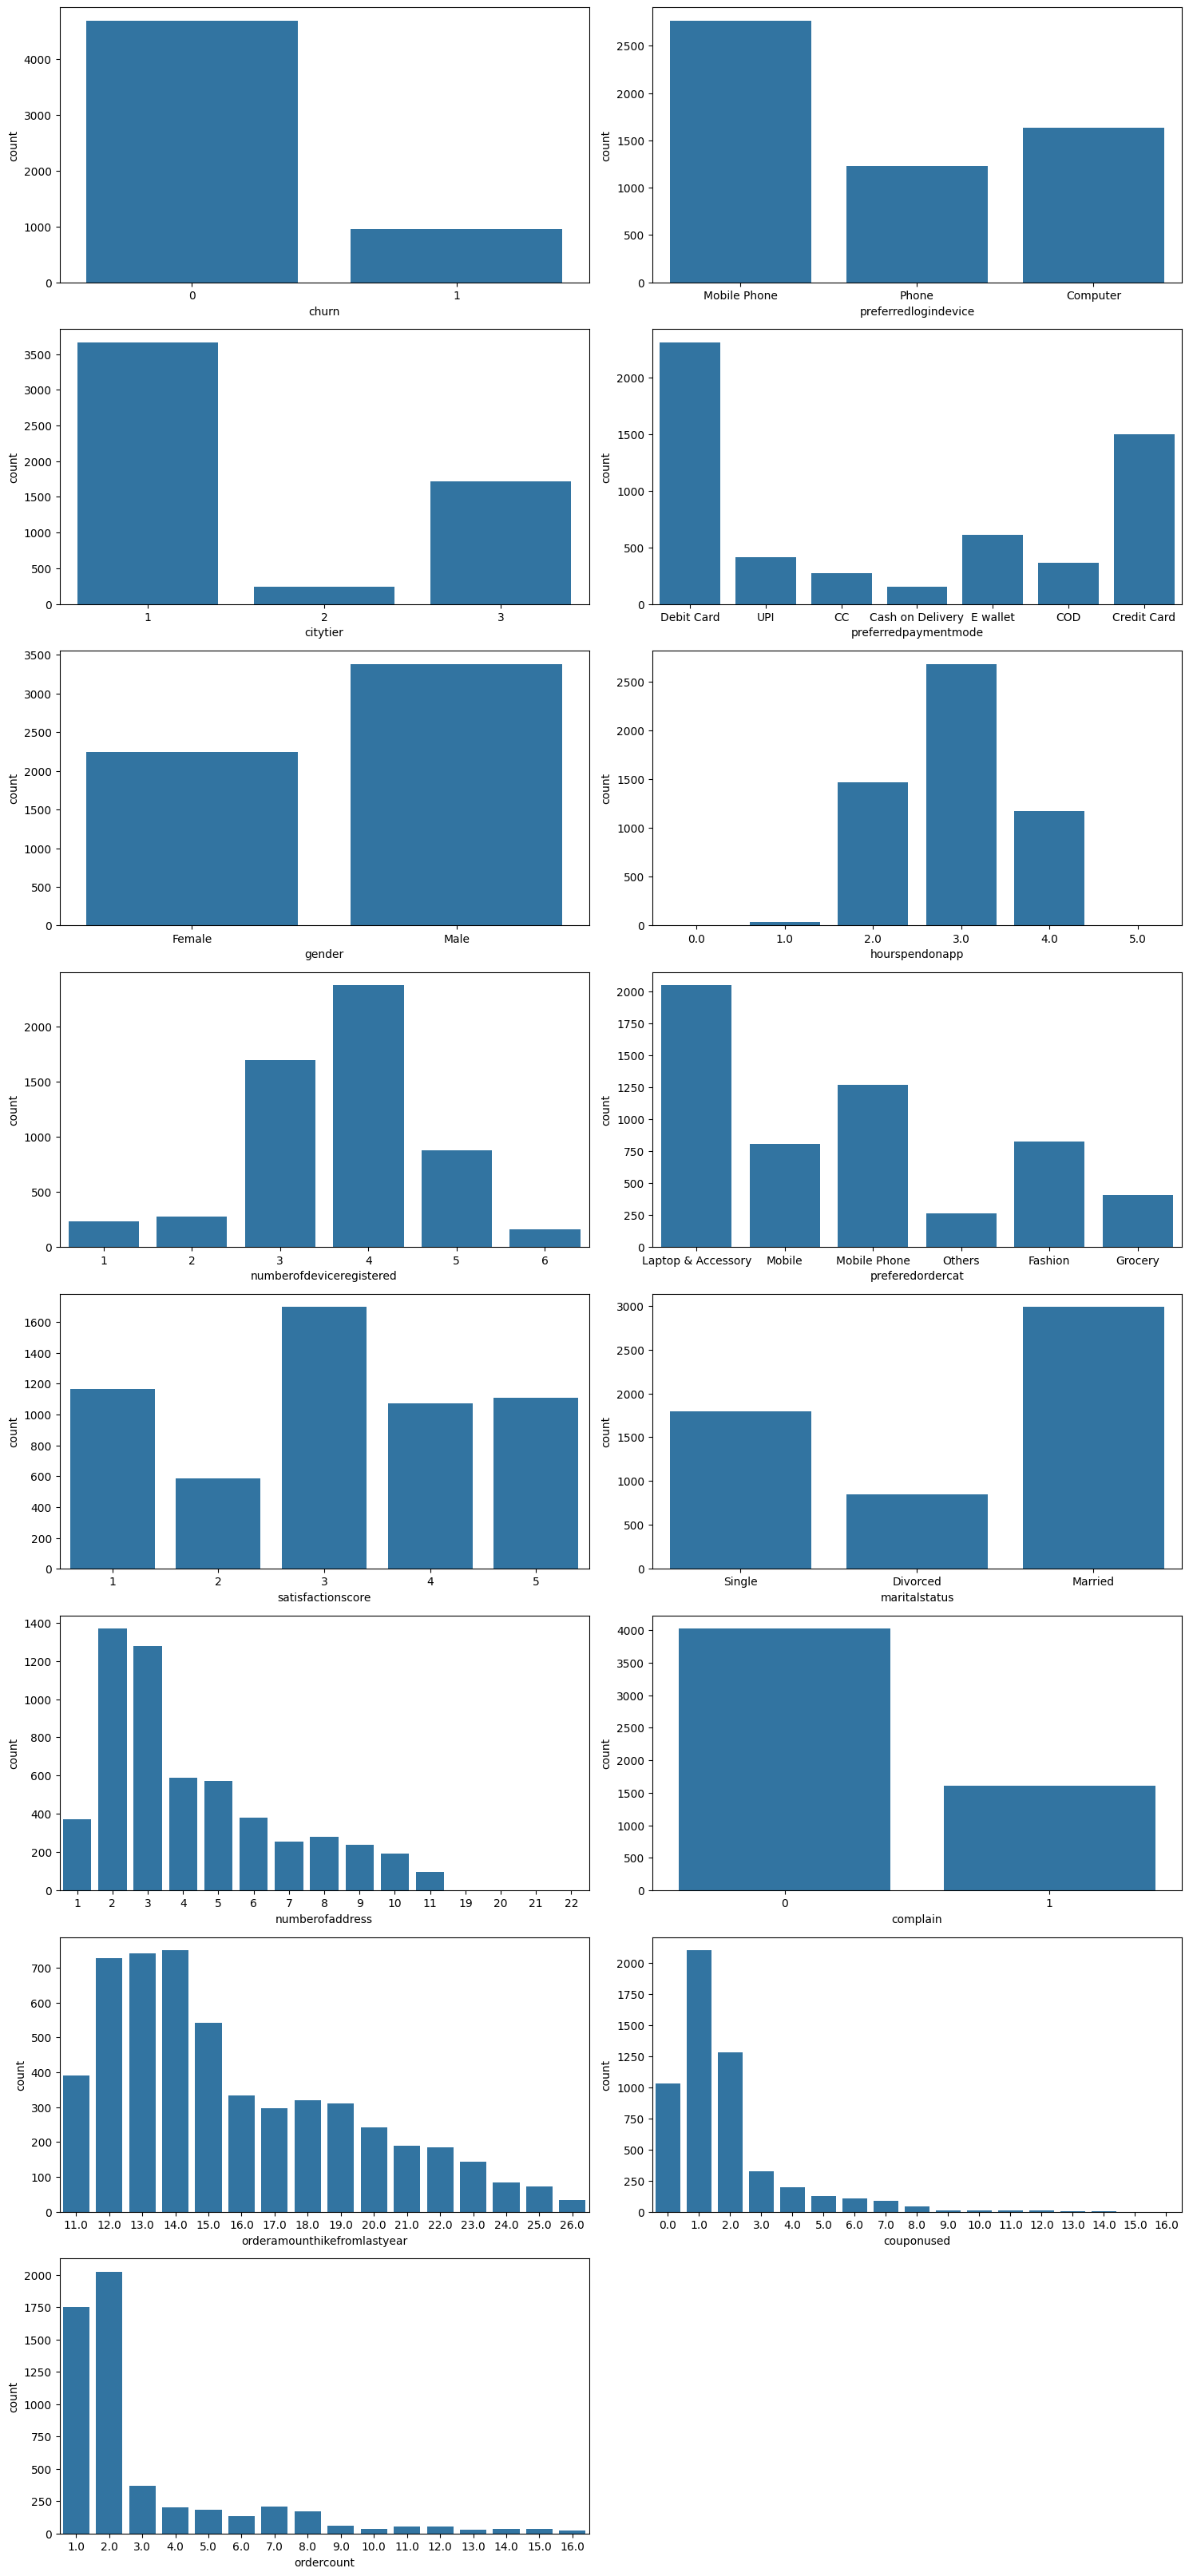

In [18]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    plt.subplot(10,2,plot_num) # Matplotlib's pyplot Static visualisation
    sns.countplot(data=df, x=col) # seaborn for Statistical visualisation
    plot_num += 1
    plt.tight_layout()

**Histograms of numerical Columns**

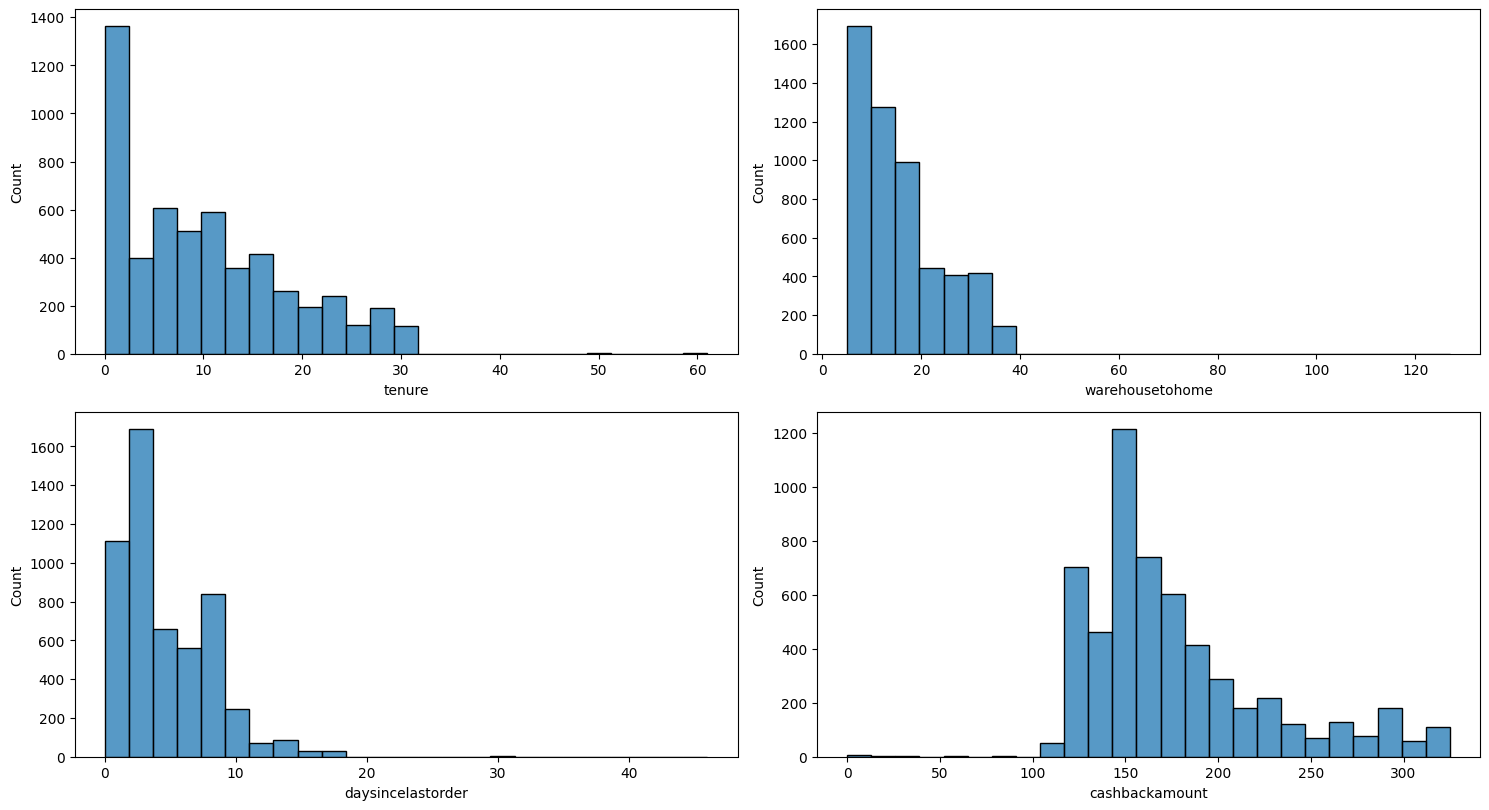

In [19]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in hist_col:
    plt.subplot(10,2,plot_num)
    sns.histplot(data=df, x=col, bins=25)
    plot_num += 1
    plt.tight_layout()

**Plot Churn Distribution for each Categorical Variable**

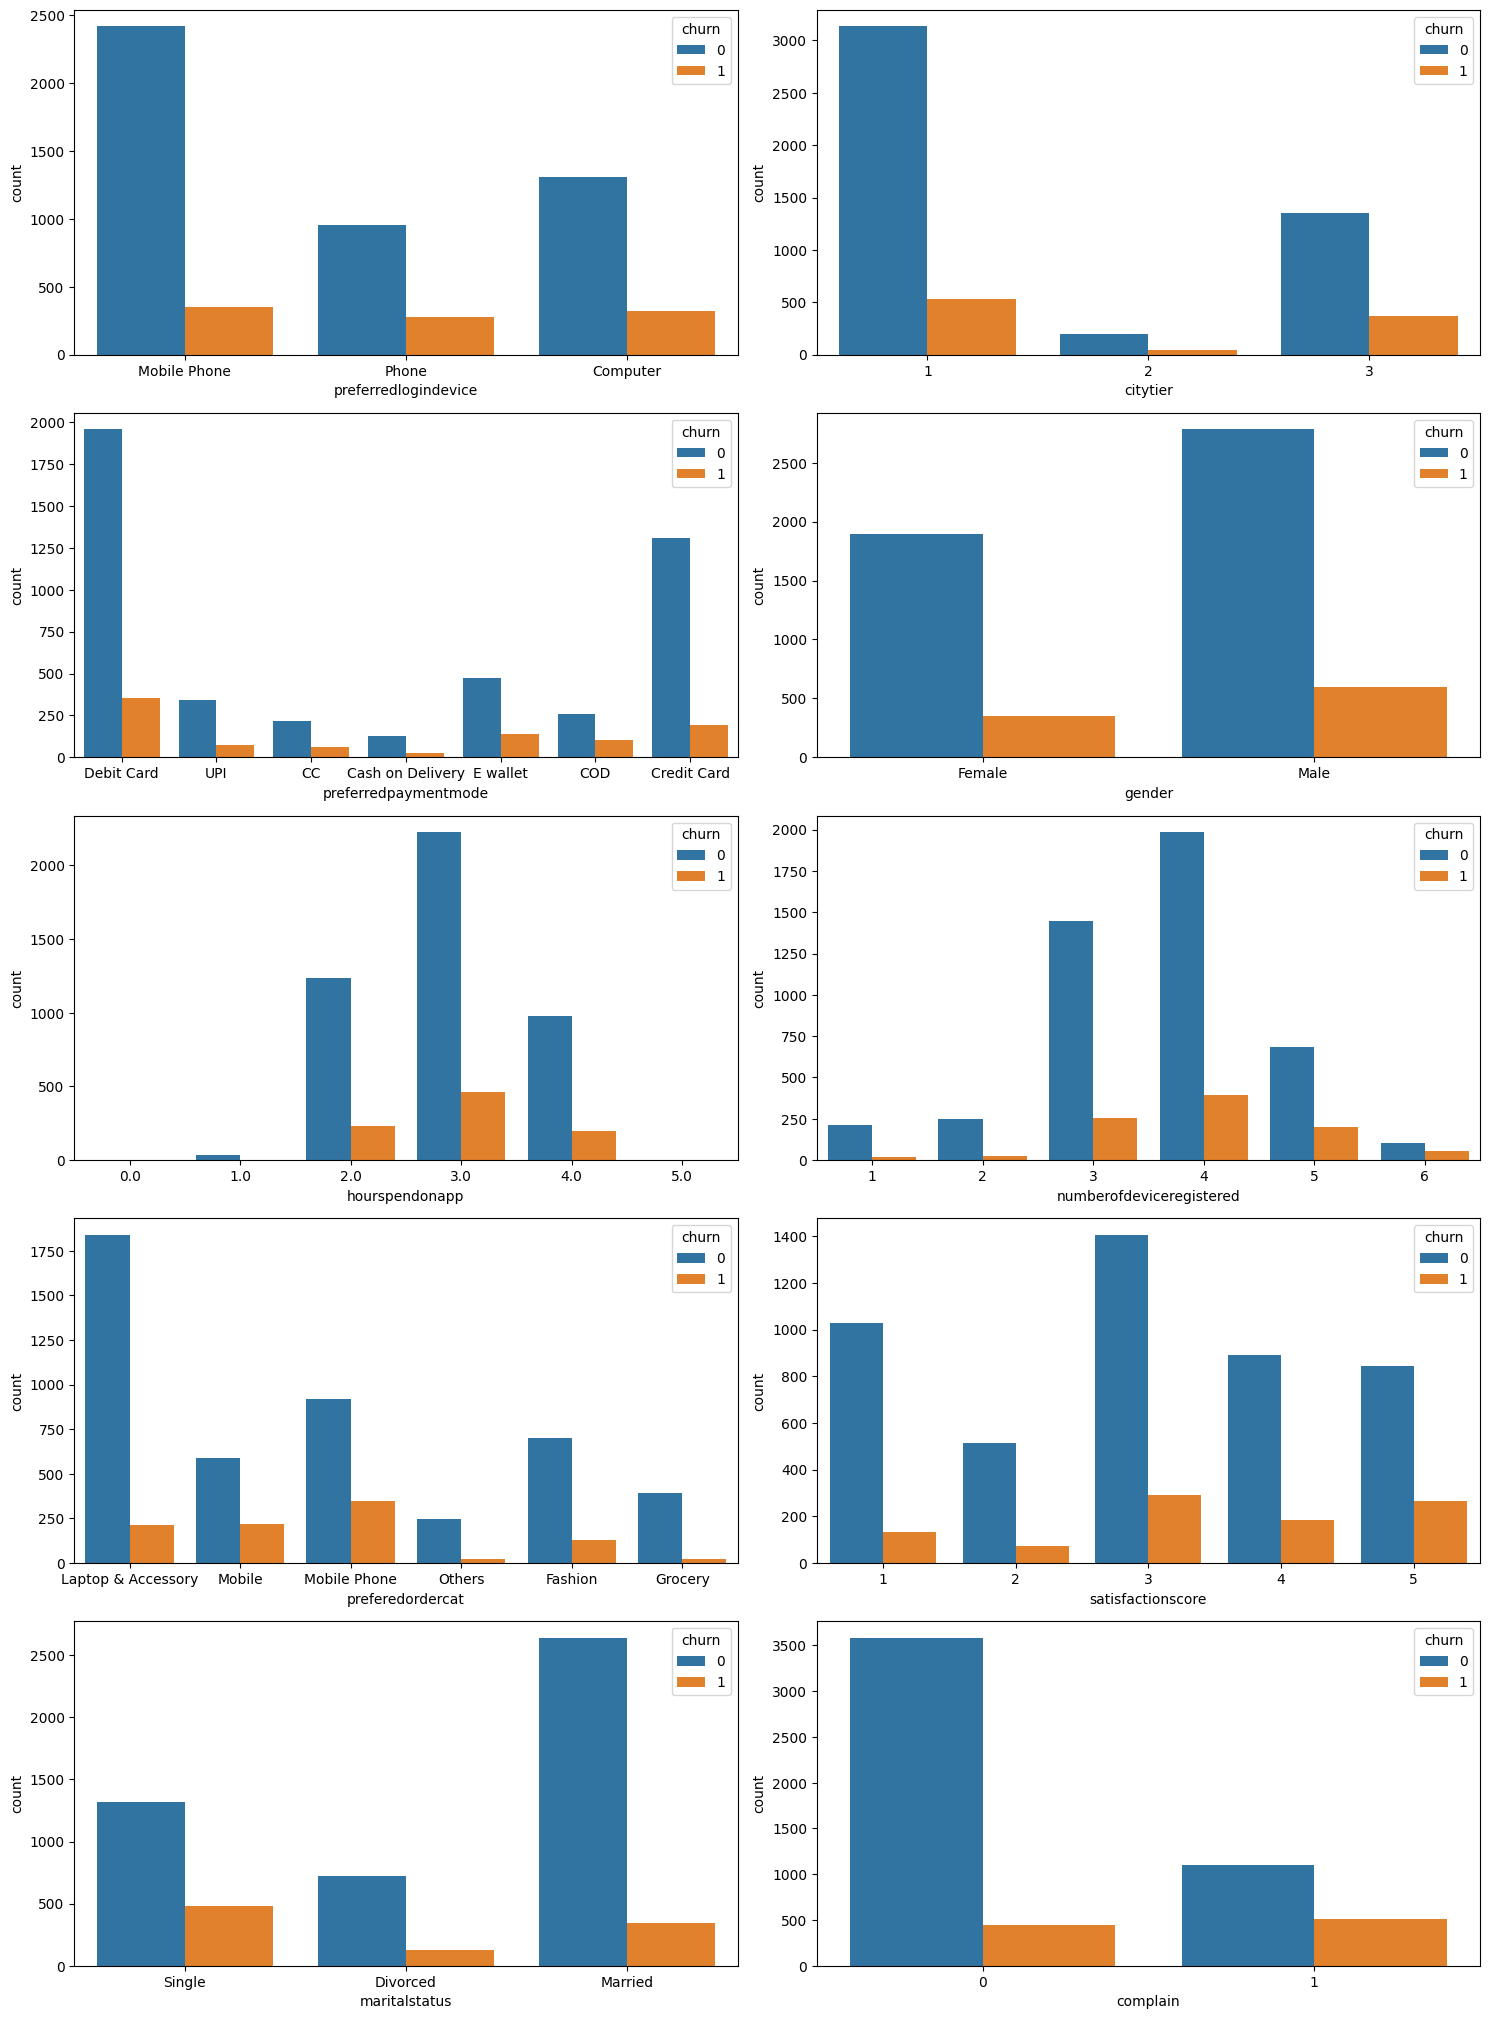

In [20]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    if df[col].nunique() <= 8 and col != "churn":
        plt.subplot(10,2,plot_num)
        sns.countplot(data=df, x=col, hue="churn")
        plot_num += 1
        plt.tight_layout()

### Impute Missing Values

In [21]:
from sklearn.impute import SimpleImputer #SimpleImputer for handling missing data with basic strategies
from sklearn.experimental import enable_iterative_imputer # Enables experimental IterativeImputer in scikit-learn
from sklearn.impute import IterativeImputer # For advanced imputation techniques using iterative models
from sklearn.ensemble import RandomForestRegressor # For regression tasks using ensemble methods
import pandas as pd # pandas library for data manipulation and analysis

def fill_missing_values(df, random_state=None):
    # Step 1: Identfy numeric and categorical columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist() # Include both string and category data

    # Step 2: Impute numeric columns
    numeric_imputer = SimpleImputer(strategy='mean')
    df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

    # Step 3: Handle categorical columns
    for col in categorical_columns:
        if df[col].dtype == 'object':
            # Convert categorical column to one-hot encoded representation
            encoded_cols = pd.get_dummies(df[col], prefix=col)
            # Concatenate one-hot encoded columns
            df = pd.concat([df.drop(col, axis=1), encoded_cols], axis=1)

    # Step 4: Random Forest Iterative Imputer for the entire DataFrame
    rf_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=random_state))
    df = pd.DataFrame(rf_imputer.fit_transform(df), columns=df.columns)

    return df

# Call the call to fill missing values
df = fill_missing_values(df, random_state=42)


In [22]:
df.head()

,churn,tenure,citytier,warehousetohome,hourspendonapp,numberofdeviceregistered,satisfactionscore,numberofaddress,complain,orderamounthikefromlastyear,couponused,ordercount,daysincelastorder,cashbackamount,preferredlogindevice_Computer,preferredlogindevice_Mobile Phone,preferredlogindevice_Phone,preferredpaymentmode_CC,preferredpaymentmode_COD,preferredpaymentmode_Cash on Delivery,preferredpaymentmode_Credit Card,preferredpaymentmode_Debit Card,preferredpaymentmode_E wallet,preferredpaymentmode_UPI,gender_Female,gender_Male,preferedordercat_Fashion,preferedordercat_Grocery,preferedordercat_Laptop & Accessory,preferedordercat_Mobile,preferedordercat_Mobile Phone,preferedordercat_Others,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single
0,1.0,4.000000,3.0,6.0,3.000000,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,159.93,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,10.189899,1.0,8.0,3.000000,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,120.90,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,10.189899,1.0,30.0,2.000000,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.28,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.000000,3.0,15.0,2.000000,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.07,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.000000,1.0,12.0,2.931535,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,129.60,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Model Building

#### Split dataset into Training set and Test set

In [23]:
X = df.drop(columns=["churn"]) # Independent variables
y = df["churn"]                # Dependent variable, our target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Handling the Imbalanced dataset

In [27]:
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique(SMOTE) from imbalanced-learn library

print('Before upsampling count of label 0 (Retained) {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 (Churned) {}'.format(sum(y_train==1)))

# Minority Over Sampling Technique, Generating synthetic samples for the minority class
# (e.g., customers who churn) may have fewer instances than the other class (e.g., customers who don’t churn)
sm = SMOTE(sampling_strategy = 1, random_state=1) # sampling strategy creates 1:1 ratio after resampling
X_train_s, y_train_s = sm.fit_resample(X_train, y_train.ravel()) #

print('After upsampling count of lable 0 (Retained) {}'.format(sum(y_train_s==0)))
print('After upsampling count of label 1 (Churned) {}'.format(sum(y_train_s==1)))

# After SMOTE, both classes have the same number of instances, 
# which improves the model's ability to learn patterns for both classes equally.

Before upsampling count of label 0 (Retained) 3743
Before upsampling count of label 1 (Churned) 761
After upsampling count of lable 0 (Retained) 3743
After upsampling count of label 1 (Churned) 3743


#### Model Evaluation with Cross Validation

In [28]:
from sklearn.model_selection import GridSearchCV # 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV # Logistic regression with cross-validation, Ridge classifier with cross-validation
from sklearn.neighbors import KNeighborsClassifier # k-Nearest Neighbors classifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV      # Hyperparameter tuning
from sklearn.preprocessing import StandardScaler      # Standardizing features
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Confusion matrix & display
from sklearn import feature_selection                 # Feature selection methods
from sklearn import model_selection                   # Model selection & cross-validation
from sklearn import metrics                           # Performance metrics

from sklearn.linear_model import LogisticRegressionCV  # Logistic regression with cross-validation
from sklearn.linear_model import RidgeClassifierCV     # Ridge classifier with cross-validation
from sklearn.neighbors import KNeighborsClassifier     # k-Nearest Neighbors classifier
from sklearn.ensemble import AdaBoostClassifier        # AdaBoost ensemble classifier
from sklearn.ensemble import BaggingClassifier         # Bagging ensemble classifier
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting classifier
from sklearn.ensemble import RandomForestClassifier    # Random Forest classifier
from xgboost import XGBClassifier                      # XGBoost classifier


